t_initial= 1.0018541721743827e-07 and z_initial= 86900
t_recomb= 5.7894980081068825e-05 and z_recomb= 3213.285714285714
t_de= 9.648052091024873 and z_de= 0.39311306546041047
to= 13.928934631892979 and z0= 0
[1.00185417e-07 1.00187709e-07 1.00190001e-07 ... 3.40619473e+00
 6.04924043e+00 1.39289346e+01]


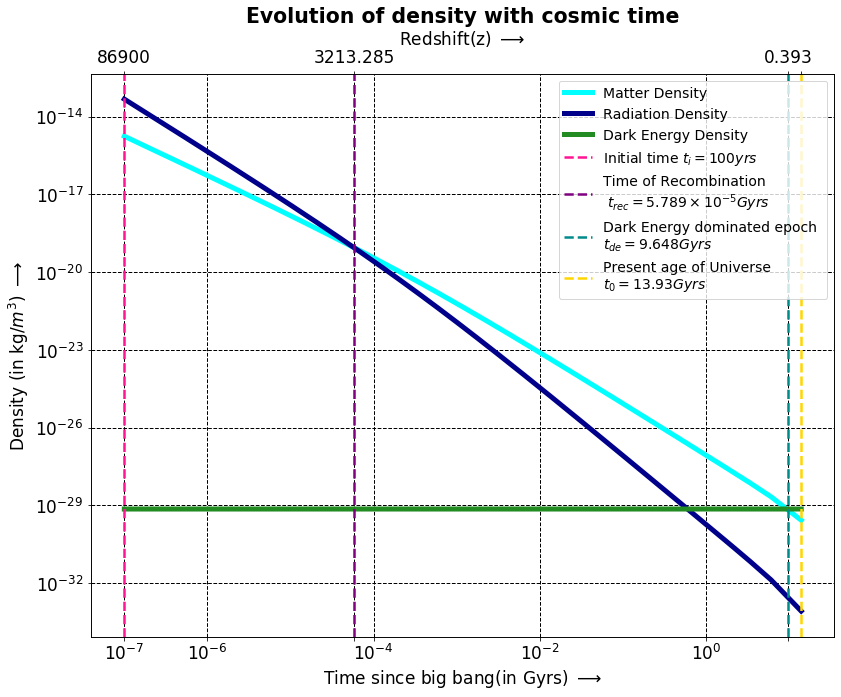

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
plt.rcParams.update({'font.size': 17})

omega_rad_0= 8.4*(1e-05)
omega_m_0= 0.27
omega_de=0.73
#omega_k=0
H0=69.7/(3.086*(1e19))
#H0=22.727*(1e-19)#in s^-1
Gyr=3.154*(1e16)#1Gyr in seconds


def t(z):
    E=omega_m_0*((1+z)**3)+omega_rad_0*((1+z)**4)+omega_de
    return 1/(H0*(1+z)*(np.sqrt(E)))
    
rho_c= 9.9*(1e-30)
rhom_0=rho_c*omega_m_0
rho_rad0=rho_c*omega_rad_0
rho_de=rho_c*omega_de


def rhom(z):
    return rhom_0*((1+z)**3)

def rhorad(z):
    return rho_rad0*((1+z)**4)



z=np.arange(86900,-1/2,-1,dtype=np.float128)


ro_m=rhom(z)
ro_r=rhorad(z)
ro_de=rho_de*np.ones(len(z))


z_a=((omega_de/omega_m_0)**(1/3))-1
a_a=1/(1+z_a)
t_a=integrate.quad(t,z_a,np.inf)[0]# in seconds
t0=integrate.quad(t,0,np.inf)[0]

t_af=t_a/Gyr
t0f=t0/Gyr


z_b=omega_m_0/omega_rad_0-1;
a_b=1/(1+z_b)
t_b=integrate.quad(t,z_b,np.inf)[0]
t_bf=t_b/Gyr


zi=86900
ai=1/(1+zi)
t_i=integrate.quad(t,zi,np.inf)[0]/Gyr


print('t_initial=', t_i,'and z_initial=',zi)
print('t_recomb=',t_bf, 'and z_recomb=',z_b)
print('t_de=',t_af, 'and z_de=',z_a)

print('to=',t0f, 'and z0=',0)



fig=plt.figure(figsize=(12,10))
ax1=plt.subplot()


t_arr=np.zeros(len(z))
for j in range(len(z)):
    t_arr[j]=integrate.quad(t,z[j],np.inf)[0]
    



print(t_arr/Gyr)

ax1.loglog(t_arr/Gyr,ro_m,color= 'Cyan',lw='5',label='Matter Density')
ax1.loglog(t_arr/Gyr,ro_r,color= 'darkblue',lw='5',label='Radiation Density')
ax1.loglog(t_arr/Gyr,ro_de,color= 'forestgreen',lw='5',label='Dark Energy Density')
extraticks=[1e-07,5.8e-05,9.648]
ax1.set_xticks(list(ax1.get_xticks())+extraticks)

ax1.set_xlim(3.93e-08,35)

ax1.set_xlabel('Time since big bang(in Gyrs) '+r'$\longrightarrow$')
ax1.set_ylabel('Density (in kg/'+r'$m^3$'+') '+r'$\longrightarrow$')


#x1, x2 = ax1.get_xlim()
#print(x1,x2)



ax2= ax1.twiny()

ax2.set_xlabel('Redshift(z) '+r'$\longrightarrow$')




ax2.set_xlim((ax1.get_xlim()))
ax2.set_xscale('log')

#new_tick_locations = [ 5.78949e-05,9.648, 13.9289]# [0,0.3931,3213.285]
ax2.set_xticks([t_arr[0]/Gyr,5.78949e-05,9.648, 13.9289])
ax2.set_xticklabels([zi,3213.285,0.393]) 


xcoords = [t_i,t_bf, t_af, t0f]

colors = ['deeppink','purple','darkcyan','gold']
tlabel=['Initial time '+r'$t_i=100 yrs$','Time of Recombination \n '+r'$t_{rec}=5.789 \times 10^{-5} Gyrs$',
        'Dark Energy dominated epoch \n' +r'$t_{de}=9.648 Gyrs$','Present age of Universe \n'+r'$t_0=13.93 Gyrs$']

for xc,c,l in zip(xcoords,colors,tlabel):
    ax1.axvline(x=xc, c=c,ls='--',lw='2.5',label=l)



#ax2.loglog

ax1.set_title('Evolution of density with cosmic time',fontweight="bold")

#ax1.xaxis.set_major_locator(MultipleLocator())
#ax1.yaxis.set_major_locator(MultipleLocator())
ax1.grid(alpha=1,color='black', linestyle='--',linewidth=1.)
ax1.legend(loc='upper right',fontsize='14')
plt.tight_layout()
plt.savefig('A2_final')


In [ ]:

#def tick_function(X):
  #  V = 1/(1+X)
  #  return ["%.3f" % z for z in V]

    
#ax2.set_xlabel('label')
#plt.show()
#ax1.set_xlim(100000,0)


#ax1.xaxis.set_major_locator(MultipleLocator(10**4))
#ax1.yaxis.set_major_locator(MultipleLocator(0.1))
#t1=np.zeros(len(z))
#for i in range(len(z)):
    #t[i]=integrate.quad(f,0,z[i])[0]/31536000


<Figure size 432x288 with 0 Axes>

In [2]:
z_a=((omega_de/omega_m_0)**(1/3))-1
a_a=1/(1+z_a)
print(z_a,a_a)
t_a=integrate.quad(t,z_a,np.inf)[0]# in seconds
t0=integrate.quad(t,0,np.inf)[0]

t_af=t_a/Gyr
t0f=t0/Gyr
print(t_af,t0f)

0.39311306546041047 0.7178168267839119
9.648052091024873 13.928934631892979


In [3]:

z_b=omega_m_0/omega_rad_0-1;
a_b=1/(1+z_b)
t_b=integrate.quad(t,z_b,np.inf)[0]
t_bf=t_b/Gyr
print(z_b,a_b,t_bf)





    


3213.285714285714 0.0003111111111111111 5.7894980081068825e-05


In [61]:
zi=86900
ai=1/(1+zi)
t_i=integrate.quad(t,zi,np.inf)[0]/Gyr
print(t_i,ai,zi)

1.0018541721743827e-07 1.1507347441341297e-05 86900


In [ ]:
t_=np.linspace(t_i,t0f,6000,endpoint=True)
#print(t_) 

#ro_rad_i=rho_rad0/((ai)**4)
#print(ro_rad_i)
def ro(t):
    return rho_rad0*((t0f/t)**2)
rof=np.zeros(len(t_))

for i in range(len(t_)):
    rof[i]=ro(t_[i])
    
def rom(t):
    return rhom_0*(((t0f/t))**2)
rhom=np.zeros(len(t_))
for i in range(len(t_)):
    rhom[i]=rom(t_[i])

plt.loglog(t_,rof,label='rad')
plt.loglog(t_,rhom,label='m')
plt.legend()
print(rof[0],rof[len(t_)-1])

#plt.loglog(t_,rhom)






In [ ]:
from sympy import *
z=symbols('z')

print(integrate(1/((1+z)*((omega_m_0*((1+z)**3)+omega_rad_0*((1+z)**4)+omega_k))**(0.5)), (z, 0, oo)))